# 多层感知机预测

Epoch 1/10
 - 0s - loss: 47508.4005
Epoch 2/10
 - 0s - loss: 41619.7266
Epoch 3/10
 - 0s - loss: 35674.2275
Epoch 4/10
 - 0s - loss: 29476.6388
Epoch 5/10
 - 0s - loss: 23402.0973
Epoch 6/10
 - 0s - loss: 17710.3242
Epoch 7/10
 - 0s - loss: 12769.3347
Epoch 8/10
 - 0s - loss: 8676.5695
Epoch 9/10
 - 0s - loss: 5583.7746
Epoch 10/10
 - 0s - loss: 3431.7782
Train Score: 2600.08 MSE (50.99 RMSE)
Validatin Score: 9463.09 MSE (97.28 RMSE)


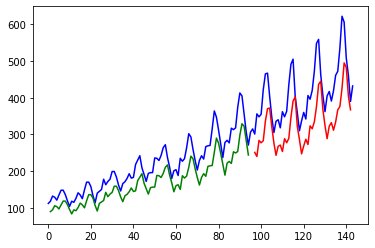

In [10]:
import numpy as np
from pandas import read_csv
from matplotlib import pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense


seed = 7
batch_size = 2
epochs = 10
filename = 'deeplearning-master/chapter18/international-airline-passengers.csv'
footer = 3
look_back=1

def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        x = dataset[i: i + look_back, 0]
        dataX.append(x)
        y = dataset[i + look_back, 0]
        dataY.append(y)
        #print('X: %s, Y: %s' % (x, y))
    return np.array(dataX), np.array(dataY)

def build_model():
    model = Sequential()
    model.add(Dense(units=8, input_dim=look_back, activation='relu'))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

if __name__ == '__main__':

    # 设置随机种子
    np.random.seed(seed)

    # 导入数据
    data = read_csv(filename, usecols=[1], engine='python', skipfooter=footer)
    dataset = data.values.astype('float32')
    train_size = int(len(dataset) * 0.67)
    validation_size = len(dataset) - train_size
    train, validation = dataset[0: train_size, :], dataset[train_size: len(dataset), :]

    # 创建dataset，让数据产生相关性
    X_train, y_train = create_dataset(train)
    X_validation, y_validation = create_dataset(validation)

    # 训练模型
    model = build_model()
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

    # 评估模型
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score, math.sqrt(train_score)))
    validation_score = model.evaluate(X_validation, y_validation, verbose=0)
    print('Validatin Score: %.2f MSE (%.2f RMSE)' % (validation_score, math.sqrt(validation_score)))

    # 图表查看预测趋势
    predict_train = model.predict(X_train)
    predict_validation = model.predict(X_validation)

    # 构建通过训练集进行预测的图表数据
    predict_train_plot = np.empty_like(dataset)
    predict_train_plot[:, :] = np.nan
    predict_train_plot[look_back:len(predict_train) + look_back, :] = predict_train

    # 构建通过评估数据集进行预测的图表数据
    predict_validation_plot = np.empty_like(dataset)
    predict_validation_plot[:, :] = np.nan
    predict_validation_plot[len(predict_train) + look_back * 2 + 1:len(dataset) - 1, :] = predict_validation

    # 图表显示
    plt.plot(dataset, color='blue')
    plt.plot(predict_train_plot, color='green')
    plt.plot(predict_validation_plot, color='red')
    plt.show()


# 多变量多层感知机的预测

Epoch 1/10
 - 0s - loss: 56179.4079
Epoch 2/10
 - 0s - loss: 35550.1702
Epoch 3/10
 - 0s - loss: 22984.8977
Epoch 4/10
 - 0s - loss: 12305.9045
Epoch 5/10
 - 0s - loss: 5404.7694
Epoch 6/10
 - 0s - loss: 2176.5645
Epoch 7/10
 - 0s - loss: 1245.3166
Epoch 8/10
 - 0s - loss: 1095.9429
Epoch 9/10
 - 0s - loss: 1072.7680
Epoch 10/10
 - 0s - loss: 1063.4924
Train Score: 1044.57 MSE (32.32 RMSE)
Validatin Score: 5103.43 MSE (71.44 RMSE)


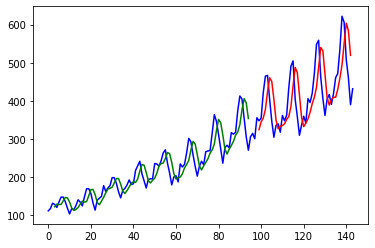

In [11]:
import numpy as np
from pandas import read_csv
from matplotlib import pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense


seed = 7
batch_size = 2
epochs = 10
filename = 'deeplearning-master/chapter18/international-airline-passengers.csv'
footer = 3
look_back=3

def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        x = dataset[i: i + look_back, 0]
        dataX.append(x)
        y = dataset[i + look_back, 0]
        dataY.append(y)
        #print('X: %s, Y: %s' % (x, y))
    return np.array(dataX), np.array(dataY)

def build_model():
    model = Sequential()
    model.add(Dense(units=12, input_dim=look_back, activation='relu'))
    model.add(Dense(units=8, activation='relu'))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

if __name__ == '__main__':

    # 设置随机种子
    np.random.seed(seed)

    # 导入数据
    data = read_csv(filename, usecols=[1], engine='python', skipfooter=footer)
    dataset = data.values.astype('float32')
    train_size = int(len(dataset) * 0.67)
    validation_size = len(dataset) - train_size
    train, validation = dataset[0: train_size, :], dataset[train_size: len(dataset), :]

    # 创建dataset，让数据产生相关性
    X_train, y_train = create_dataset(train)
    X_validation, y_validation = create_dataset(validation)

    # 训练模型
    model = build_model()
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

    # 评估模型
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score, math.sqrt(train_score)))
    validation_score = model.evaluate(X_validation, y_validation, verbose=0)
    print('Validatin Score: %.2f MSE (%.2f RMSE)' % (validation_score, math.sqrt(validation_score)))

    # 图表查看预测趋势
    predict_train = model.predict(X_train)
    predict_validation = model.predict(X_validation)

    # 构建通过训练集进行预测的图表数据
    predict_train_plot = np.empty_like(dataset)
    predict_train_plot[:, :] = np.nan
    predict_train_plot[look_back:len(predict_train) + look_back, :] = predict_train

    # 构建通过评估数据集进行预测的图表数据
    predict_validation_plot = np.empty_like(dataset)
    predict_validation_plot[:, :] = np.nan
    predict_validation_plot[len(predict_train) + look_back * 2 + 1:len(dataset) - 1, :] = predict_validation

    # 图表显示
    plt.plot(dataset, color='blue')
    plt.plot(predict_train_plot, color='green')
    plt.plot(predict_validation_plot, color='red')
    plt.show()


# LSTM预测回归问题

(94, 1, 1)
(1, 1)
Epoch 1/10
 - 0s - loss: 0.0409
Epoch 2/10
 - 0s - loss: 0.0197
Epoch 3/10
 - 0s - loss: 0.0141
Epoch 4/10
 - 0s - loss: 0.0127
Epoch 5/10
 - 0s - loss: 0.0117
Epoch 6/10
 - 0s - loss: 0.0106
Epoch 7/10
 - 0s - loss: 0.0096
Epoch 8/10
 - 0s - loss: 0.0087
Epoch 9/10
 - 0s - loss: 0.0076
Epoch 10/10
 - 0s - loss: 0.0065
Train Score: 39.96 RMSE
Validatin Score: 108.83 RMSE


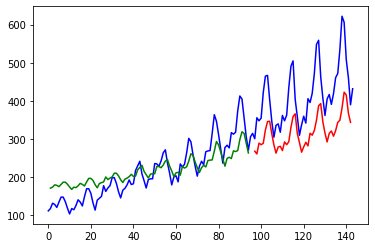

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

seed = 7
batch_size = 1
epochs = 10
filename = 'deeplearning-master/chapter19/international-airline-passengers.csv'
footer = 3
look_back=1

def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        x = dataset[i: i + look_back, 0]
        dataX.append(x)
        y = dataset[i + look_back, 0]
        dataY.append(y)
        #print('X: %s, Y: %s' % (x, y))
    return np.array(dataX), np.array(dataY)

def build_model():
    model = Sequential()
    model.add(LSTM(units=4, input_shape=(1, look_back)))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

if __name__ == '__main__':

    # 设置随机种子
    np.random.seed(seed)

    # 导入数据
    data = read_csv(filename, usecols=[1], engine='python', skipfooter=footer)
    dataset = data.values.astype('float32')
    # 标准化数据
    scaler = MinMaxScaler()
    dataset = scaler.fit_transform(dataset)
    train_size = int(len(dataset) * 0.67)
    validation_size = len(dataset) - train_size
    train, validation = dataset[0: train_size, :], dataset[train_size: len(dataset), :]

    # 创建dataset，让数据产生相关性
    X_train, y_train = create_dataset(train)
    X_validation, y_validation = create_dataset(validation)

    # 将输入转化成为【sample， time steps, feature]
    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    print(X_train.shape)
    print(X_train[0].shape)
    X_validation = np.reshape(X_validation, (X_validation.shape[0], 1, X_validation.shape[1]))

    # 训练模型
    model = build_model()
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

    # 模型预测数据
    predict_train = model.predict(X_train)
    predict_validation = model.predict(X_validation)

    # 反标准化数据 --- 目的是保证MSE的准确性
    predict_train = scaler.inverse_transform(predict_train)
    y_train = scaler.inverse_transform([y_train])
    predict_validation = scaler.inverse_transform(predict_validation)
    y_validation = scaler.inverse_transform([y_validation])

    # 评估模型
    train_score = math.sqrt(mean_squared_error(y_train[0], predict_train[:, 0]))
    print('Train Score: %.2f RMSE' % train_score)
    validation_score = math.sqrt(mean_squared_error(y_validation[0], predict_validation[:, 0]))
    print('Validatin Score: %.2f RMSE' % validation_score)

    # 构建通过训练集进行预测的图表数据
    predict_train_plot = np.empty_like(dataset)
    predict_train_plot[:, :] = np.nan
    predict_train_plot[look_back:len(predict_train) + look_back, :] = predict_train

    # 构建通过评估数据集进行预测的图表数据
    predict_validation_plot = np.empty_like(dataset)
    predict_validation_plot[:, :] = np.nan
    predict_validation_plot[len(predict_train) + look_back * 2 + 1:len(dataset) - 1, :] = predict_validation

    # 图表显示
    dataset = scaler.inverse_transform(dataset)
    plt.plot(dataset, color='blue')
    plt.plot(predict_train_plot, color='green')
    plt.plot(predict_validation_plot, color='red')
    plt.show()

# LSTM窗口的方法预测

Using TensorFlow backend.


X: [0.01544401 0.02702703 0.05405405], Y: 0.04826255
X: [0.02702703 0.05405405 0.04826255], Y: 0.032818526
X: [0.05405405 0.04826255 0.03281853], Y: 0.059845567
X: [0.04826255 0.03281853 0.05984557], Y: 0.08494207
X: [0.03281853 0.05984557 0.08494207], Y: 0.08494207
X: [0.05984557 0.08494207 0.08494207], Y: 0.06177607
X: [0.08494207 0.08494207 0.06177607], Y: 0.02895753
X: [0.08494207 0.06177607 0.02895753], Y: 0.0
X: [0.06177607 0.02895753 0.        ], Y: 0.027027026
X: [0.02895753 0.         0.02702703], Y: 0.021235526
X: [0.         0.02702703 0.02123553], Y: 0.042471036
X: [0.02702703 0.02123553 0.04247104], Y: 0.07142857
X: [0.02123553 0.04247104 0.07142857], Y: 0.059845567
X: [0.04247104 0.07142857 0.05984557], Y: 0.040540546
X: [0.07142857 0.05984557 0.04054055], Y: 0.08687258
X: [0.05984557 0.04054055 0.08687258], Y: 0.12741312
X: [0.04054055 0.08687258 0.12741312], Y: 0.12741312
X: [0.08687258 0.12741312 0.12741312], Y: 0.10424709
X: [0.12741312 0.12741312 0.10424709], Y: 0.05

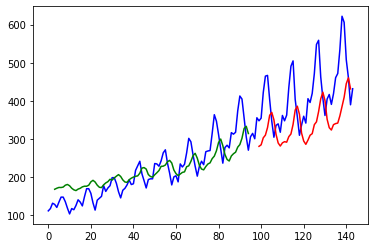

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

seed = 7
batch_size = 1
epochs = 10
filename = 'deeplearning-master/chapter19/international-airline-passengers.csv'
footer = 3
look_back=3

def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        x = dataset[i: i + look_back, 0]
        dataX.append(x)
        y = dataset[i + look_back, 0]
        dataY.append(y)
        print('X: %s, Y: %s' % (x, y))
    return np.array(dataX), np.array(dataY)

def build_model():
    model = Sequential()
    model.add(LSTM(units=4, input_shape=(1, look_back)))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

if __name__ == '__main__':

    # 设置随机种子
    np.random.seed(seed)

    # 导入数据
    data = read_csv(filename, usecols=[1], engine='python', skipfooter=footer)
    dataset = data.values.astype('float32')
    # 标准化数据
    scaler = MinMaxScaler()
    dataset = scaler.fit_transform(dataset)
    train_size = int(len(dataset) * 0.67)
    validation_size = len(dataset) - train_size
    train, validation = dataset[0: train_size, :], dataset[train_size: len(dataset), :]

    # 创建dataset，让数据产生相关性
    X_train, y_train = create_dataset(train)
    X_validation, y_validation = create_dataset(validation)

    # 将输入转化成为【sample， time steps, feature]
    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_validation = np.reshape(X_validation, (X_validation.shape[0], 1, X_validation.shape[1]))

    # 训练模型
    model = build_model()
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

    # 模型预测数据
    predict_train = model.predict(X_train)
    predict_validation = model.predict(X_validation)

    # 反标准化数据 --- 目的是保证MSE的准确性
    predict_train = scaler.inverse_transform(predict_train)
    y_train = scaler.inverse_transform([y_train])
    predict_validation = scaler.inverse_transform(predict_validation)
    y_validation = scaler.inverse_transform([y_validation])

    # 评估模型
    train_score = math.sqrt(mean_squared_error(y_train[0], predict_train[:, 0]))
    print('Train Score: %.2f RMSE' % train_score)
    validation_score = math.sqrt(mean_squared_error(y_validation[0], predict_validation[:, 0]))
    print('Validatin Score: %.2f RMSE' % validation_score)

    # 构建通过训练集进行预测的图表数据
    predict_train_plot = np.empty_like(dataset)
    predict_train_plot[:, :] = np.nan
    predict_train_plot[look_back:len(predict_train) + look_back, :] = predict_train

    # 构建通过评估数据集进行预测的图表数据
    predict_validation_plot = np.empty_like(dataset)
    predict_validation_plot[:, :] = np.nan
    predict_validation_plot[len(predict_train) + look_back * 2 + 1:len(dataset) - 1, :] = predict_validation

    # 图表显示
    dataset = scaler.inverse_transform(dataset)
    plt.plot(dataset, color='blue')
    plt.plot(predict_train_plot, color='green')
    plt.plot(predict_validation_plot, color='red')
    plt.show()

# 时间步长的LSTM预测

[[0.01544401]]
(94, 1, 1)
Epoch 1/10
 - 1s - loss: 0.0409
Epoch 2/10
 - 0s - loss: 0.0197
Epoch 3/10
 - 0s - loss: 0.0141
Epoch 4/10
 - 0s - loss: 0.0127
Epoch 5/10
 - 0s - loss: 0.0117
Epoch 6/10
 - 0s - loss: 0.0106
Epoch 7/10
 - 0s - loss: 0.0096
Epoch 8/10
 - 0s - loss: 0.0087
Epoch 9/10
 - 0s - loss: 0.0076
Epoch 10/10
 - 0s - loss: 0.0065
Train Score: 39.95 RMSE
Validatin Score: 108.81 RMSE


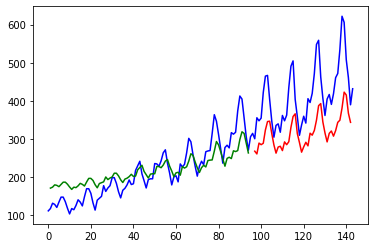

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

seed = 7
batch_size = 1
epochs = 10
filename = 'deeplearning-master/chapter19/international-airline-passengers.csv'
footer = 3
look_back=1

def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        x = dataset[i: i + look_back, 0]
        dataX.append(x)
        y = dataset[i + look_back, 0]
        dataY.append(y)
        #print('X: %s, Y: %s' % (x, y))
    return np.array(dataX), np.array(dataY)

def build_model():
    model = Sequential()
    model.add(LSTM(units=4, input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

if __name__ == '__main__':

    # 设置随机种子
    np.random.seed(seed)

    # 导入数据
    data = read_csv(filename, usecols=[1], engine='python', skipfooter=footer)
    dataset = data.values.astype('float32')
    # 标准化数据
    scaler = MinMaxScaler()
    dataset = scaler.fit_transform(dataset)
    train_size = int(len(dataset) * 0.67)
    validation_size = len(dataset) - train_size
    train, validation = dataset[0: train_size, :], dataset[train_size: len(dataset), :]

    # 创建dataset，让数据产生相关性
    X_train, y_train = create_dataset(train)
    X_validation, y_validation = create_dataset(validation)

    # 将输入转化成为【sample， time steps, feature]
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_validation = np.reshape(X_validation, (X_validation.shape[0], X_validation.shape[1], 1))
    print(X_train[0])
    print(X_train.shape)

    # 训练模型
    model = build_model()
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

    # 模型预测数据
    predict_train = model.predict(X_train)
    predict_validation = model.predict(X_validation)

    # 反标准化数据 --- 目的是保证MSE的准确性
    predict_train = scaler.inverse_transform(predict_train)
    y_train = scaler.inverse_transform([y_train])
    predict_validation = scaler.inverse_transform(predict_validation)
    y_validation = scaler.inverse_transform([y_validation])

    # 评估模型
    train_score = math.sqrt(mean_squared_error(y_train[0], predict_train[:, 0]))
    print('Train Score: %.2f RMSE' % train_score)
    validation_score = math.sqrt(mean_squared_error(y_validation[0], predict_validation[:, 0]))
    print('Validatin Score: %.2f RMSE' % validation_score)

    # 构建通过训练集进行预测的图表数据
    predict_train_plot = np.empty_like(dataset)
    predict_train_plot[:, :] = np.nan
    predict_train_plot[look_back:len(predict_train) + look_back, :] = predict_train

    # 构建通过评估数据集进行预测的图表数据
    predict_validation_plot = np.empty_like(dataset)
    predict_validation_plot[:, :] = np.nan
    predict_validation_plot[len(predict_train) + look_back * 2 + 1:len(dataset) - 1, :] = predict_validation

    # 图表显示
    dataset = scaler.inverse_transform(dataset)
    plt.plot(dataset, color='blue')
    plt.plot(predict_train_plot, color='green')
    plt.plot(predict_validation_plot, color='red')
    plt.show()

# 堆叠LSTM的批次间记忆

In [23]:
0import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

seed = 7
batch_size = 1
epochs = 100
#filename = 'international-airline-passengers.csv'
footer = 3
look_back=3

def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        x = dataset[i: i + look_back, 0]
        dataX.append(x)
        y = dataset[i + look_back, 0]
        dataY.append(y)
        print('X: %s, Y: %s' % (x, y))
    return np.array(dataX), np.array(dataY)

def build_model():
    model = Sequential()
    model.add(LSTM(units=4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

if __name__ == '__main__':

    # 设置随机种子
    np.random.seed(seed)

    # 导入数据
    data = read_csv(filename, usecols=[1], engine='python', skipfooter=footer)
    dataset = data.values.astype('float32')
    # 标准化数据
    scaler = MinMaxScaler()
    dataset = scaler.fit_transform(dataset)
    train_size = int(len(dataset) * 0.67)
    validation_size = len(dataset) - train_size
    train, validation = dataset[0: train_size, :], dataset[train_size: len(dataset), :]

    # 创建dataset，让数据产生相关性
    X_train, y_train = create_dataset(train)
    X_validation, y_validation = create_dataset(validation)

    # 将输入转化成为【sample， time steps, feature]
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_validation = np.reshape(X_validation, (X_validation.shape[0], X_validation.shape[1], 1))

    # 训练模型
    model = build_model()
    for i in range(epochs):
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, shuffle=False)
        mean_loss = np.mean(history.history['loss'])
        print('mean loss %.5f for loop %s' % (mean_loss, str(i)))
        model.reset_states()

    # 模型预测数据
    predict_train = model.predict(X_train, batch_size=batch_size)
    model.reset_states()
    predict_validation = model.predict(X_validation, batch_size=batch_size)

    # 反标准化数据 --- 目的是保证MSE的准确性
    predict_train = scaler.inverse_transform(predict_train)
    y_train = scaler.inverse_transform([y_train])
    predict_validation = scaler.inverse_transform(predict_validation)
    y_validation = scaler.inverse_transform([y_validation])

    # 评估模型
    train_score = math.sqrt(mean_squared_error(y_train[0], predict_train[:, 0]))
    print('Train Score: %.2f RMSE' % train_score)
    validation_score = math.sqrt(mean_squared_error(y_validation[0], predict_validation[:, 0]))
    print('Validatin Score: %.2f RMSE' % validation_score)

    # 构建通过训练集进行预测的图表数据
    predict_train_plot = np.empty_like(dataset)
    predict_train_plot[:, :] = np.nan
    predict_train_plot[look_back:len(predict_train) + look_back, :] = predict_train

    # 构建通过评估数据集进行预测的图表数据
    predict_validation_plot = np.empty_like(dataset)
    predict_validation_plot[:, :] = np.nan
    predict_validation_plot[len(predict_train) + look_back * 2 + 1:len(dataset) - 1, :] = predict_validation

    # 图表显示
    dataset = scaler.inverse_transform(dataset)
    plt.plot(dataset, color='blue')
    plt.plot(predict_train_plot, color='green')
    plt.plot(predict_validation_plot, color='red')
    plt.show()

SyntaxError: invalid syntax (<ipython-input-23-335854ba1ab5>, line 1)

# lstm多层叠加

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

seed = 7
batch_size = 1
epochs = 100
#filename = 'international-airline-passengers.csv'
footer = 3
look_back=3

def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        x = dataset[i: i + look_back, 0]
        dataX.append(x)
        y = dataset[i + look_back, 0]
        dataY.append(y)
        print('X: %s, Y: %s' % (x, y))
    return np.array(dataX), np.array(dataY)

def build_model():
    model = Sequential()
    model.add(LSTM(units=4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
    model.add(LSTM(units=4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

if __name__ == '__main__':

    # 设置随机种子
    np.random.seed(seed)

    # 导入数据
    data = read_csv(filename, usecols=[1], engine='python', skipfooter=footer)
    dataset = data.values.astype('float32')
    # 标准化数据
    scaler = MinMaxScaler()
    dataset = scaler.fit_transform(dataset)
    train_size = int(len(dataset) * 0.67)
    validation_size = len(dataset) - train_size
    train, validation = dataset[0: train_size, :], dataset[train_size: len(dataset), :]

    # 创建dataset，让数据产生相关性
    X_train, y_train = create_dataset(train)
    X_validation, y_validation = create_dataset(validation)

    # 将输入转化成为【sample， time steps, feature]
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_validation = np.reshape(X_validation, (X_validation.shape[0], X_validation.shape[1], 1))

    # 训练模型
    model = build_model()
    for i in range(epochs):
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, shuffle=False)
        mean_loss = np.mean(history.history['loss'])
        print('mean loss %.5f for loop %s' % (mean_loss, str(i)))
        model.reset_states()

    # 模型预测数据
    predict_train = model.predict(X_train, batch_size=batch_size)
    model.reset_states()
    predict_validation = model.predict(X_validation, batch_size=batch_size)

    # 反标准化数据 --- 目的是保证MSE的准确性
    predict_train = scaler.inverse_transform(predict_train)
    y_train = scaler.inverse_transform([y_train])
    predict_validation = scaler.inverse_transform(predict_validation)
    y_validation = scaler.inverse_transform([y_validation])

    # 评估模型
    train_score = math.sqrt(mean_squared_error(y_train[0], predict_train[:, 0]))
    print('Train Score: %.2f RMSE' % train_score)
    validation_score = math.sqrt(mean_squared_error(y_validation[0], predict_validation[:, 0]))
    print('Validatin Score: %.2f RMSE' % validation_score)

    # 构建通过训练集进行预测的图表数据
    predict_train_plot = np.empty_like(dataset)
    predict_train_plot[:, :] = np.nan
    predict_train_plot[look_back:len(predict_train) + look_back, :] = predict_train

    # 构建通过评估数据集进行预测的图表数据
    predict_validation_plot = np.empty_like(dataset)
    predict_validation_plot[:, :] = np.nan
    predict_validation_plot[len(predict_train) + look_back * 2 + 1:len(dataset) - 1, :] = predict_validation

    # 图表显示
    dataset = scaler.inverse_transform(dataset)
    plt.plot(dataset, color='blue')
    plt.plot(predict_train_plot, color='green')
    plt.plot(predict_validation_plot, color='red')
    plt.show()